# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [33]:
student_number = "400105303"
full_name = "Nikan Vasei"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [35]:
#TODO
df = pd.read_csv("./nutrition.csv")

print(df.shape[0])

df.head()

8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [36]:
#TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [37]:
#TODO
nn_cols = df.select_dtypes(exclude=["number"]).columns

n_df = df.select_dtypes(include=["number"])
n_df.drop(columns=["ID"], inplace=True)
n_df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

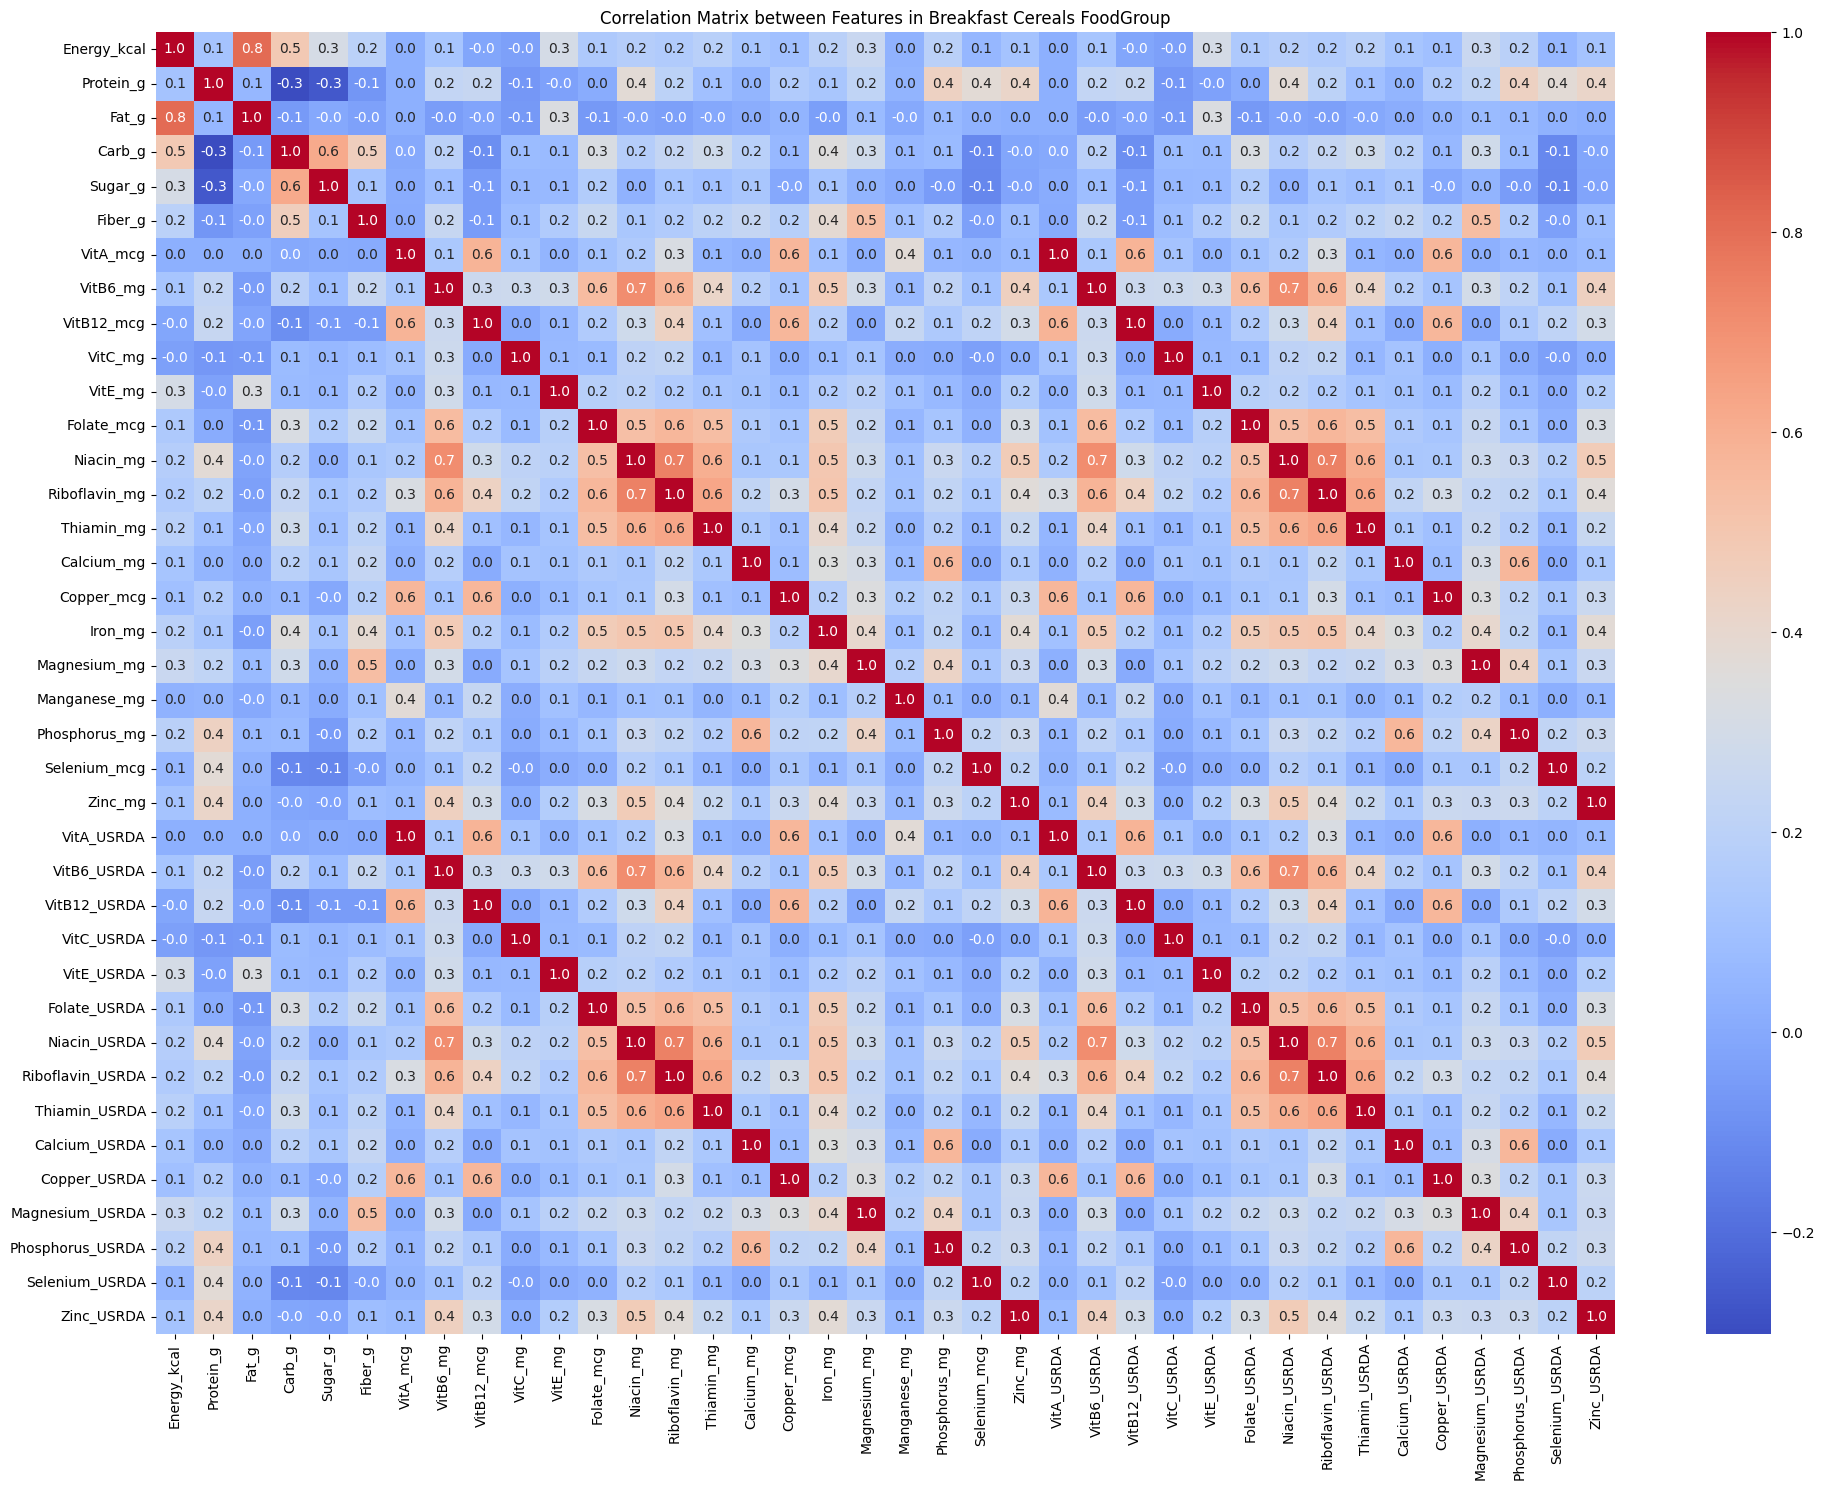

In [38]:
#TODO
corr_mat = n_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix between Features in Breakfast Cereals FoodGroup")
plt.tight_layout()
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

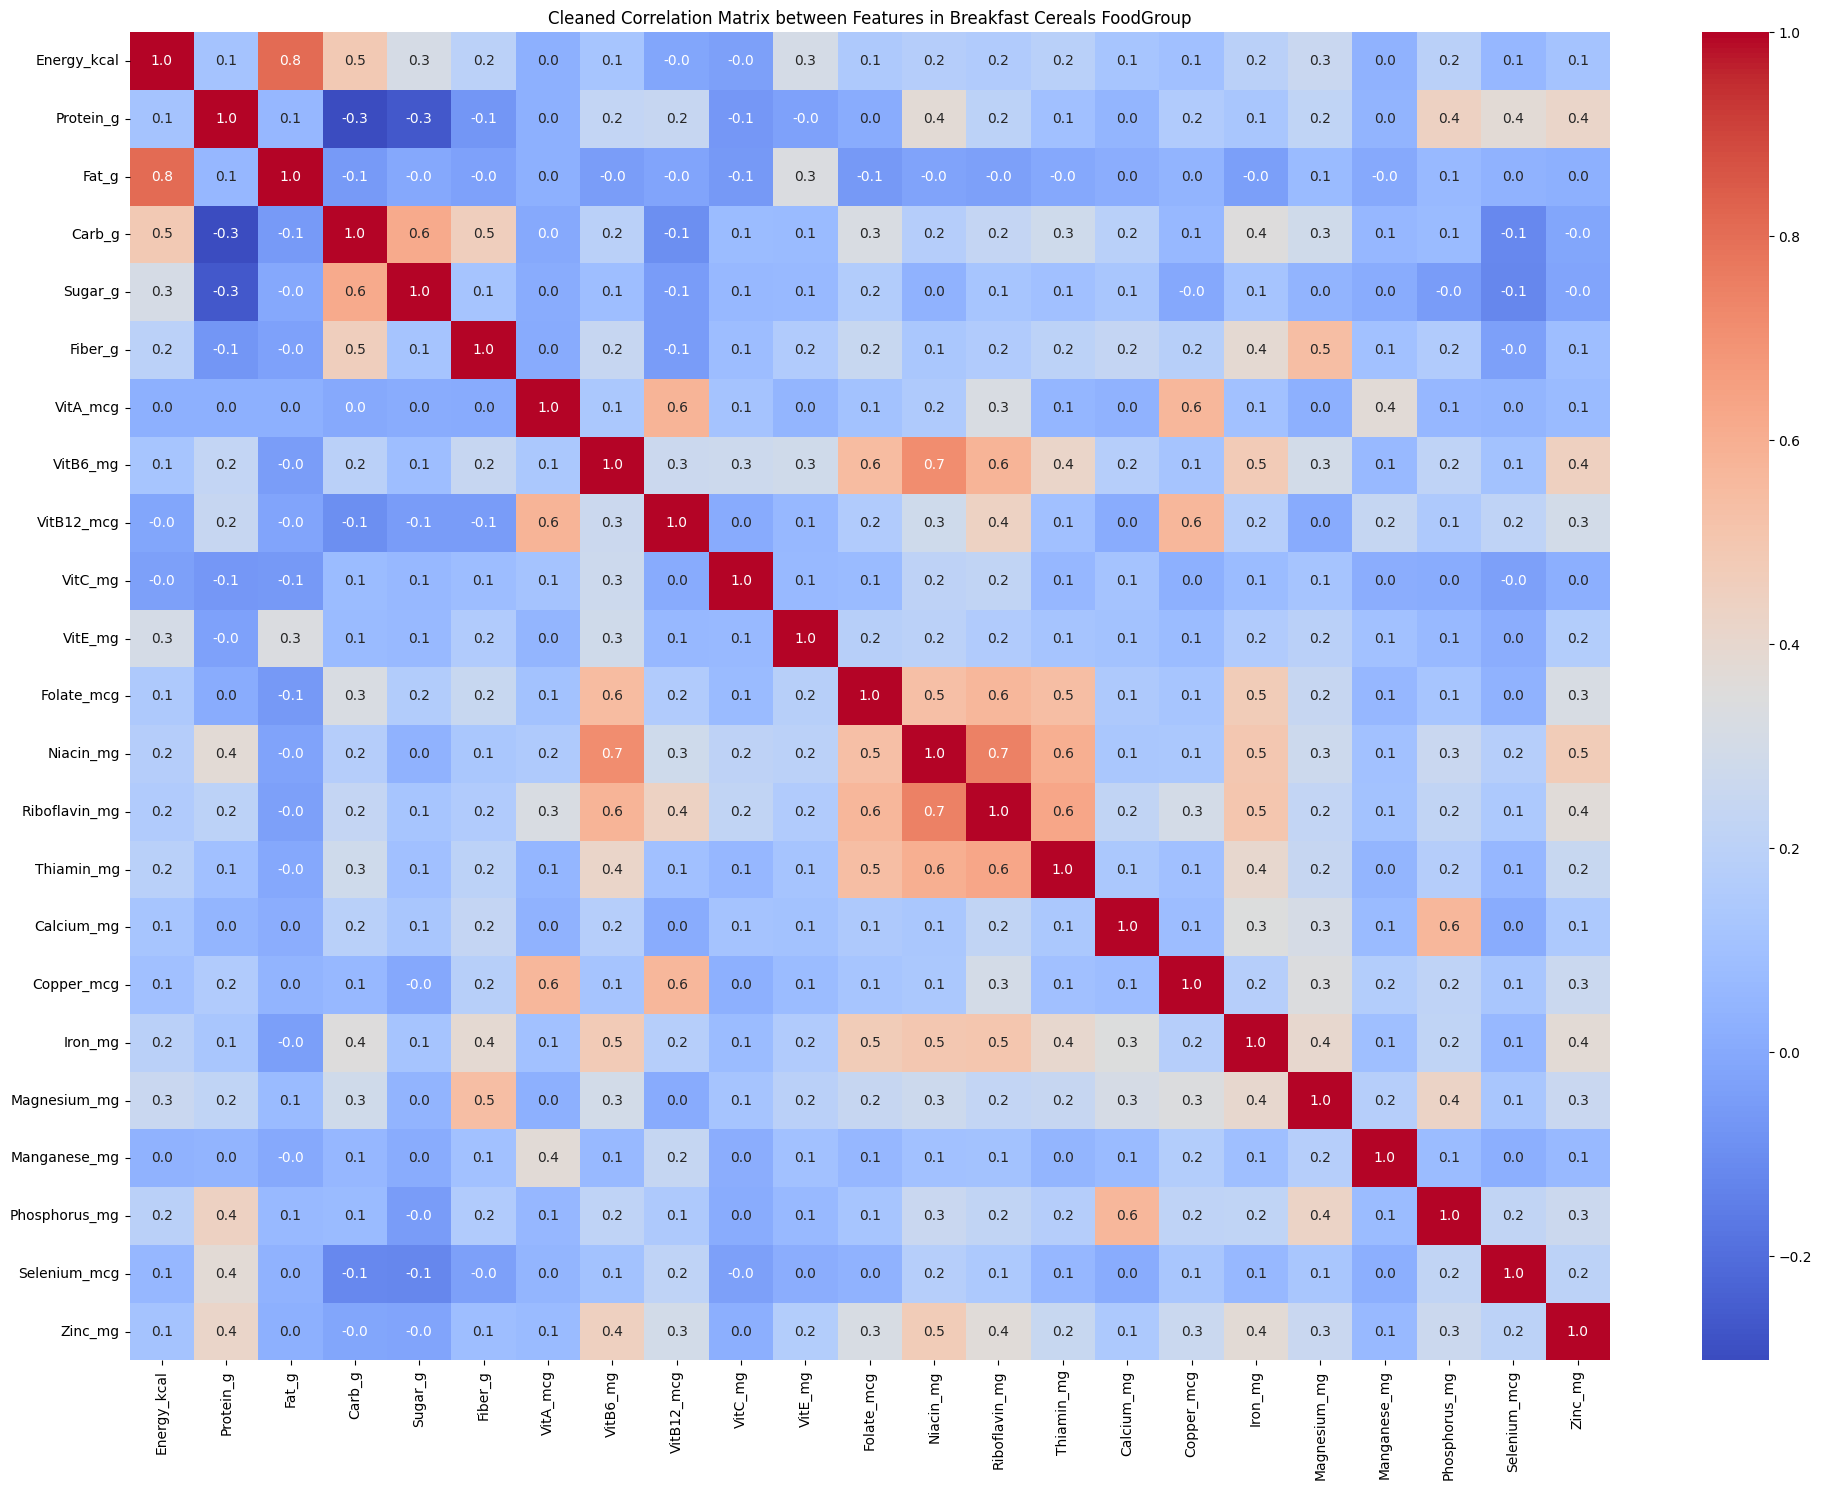

In [39]:
#TODO
redundant_features = set()

for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i, j]) > 0.9:
            redundant_features.add(corr_mat.columns[i])

n_df_clean = n_df.drop(columns=redundant_features)

corr_mat_clean = n_df_clean.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat_clean, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Cleaned Correlation Matrix between Features in Breakfast Cereals FoodGroup")
plt.tight_layout()
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

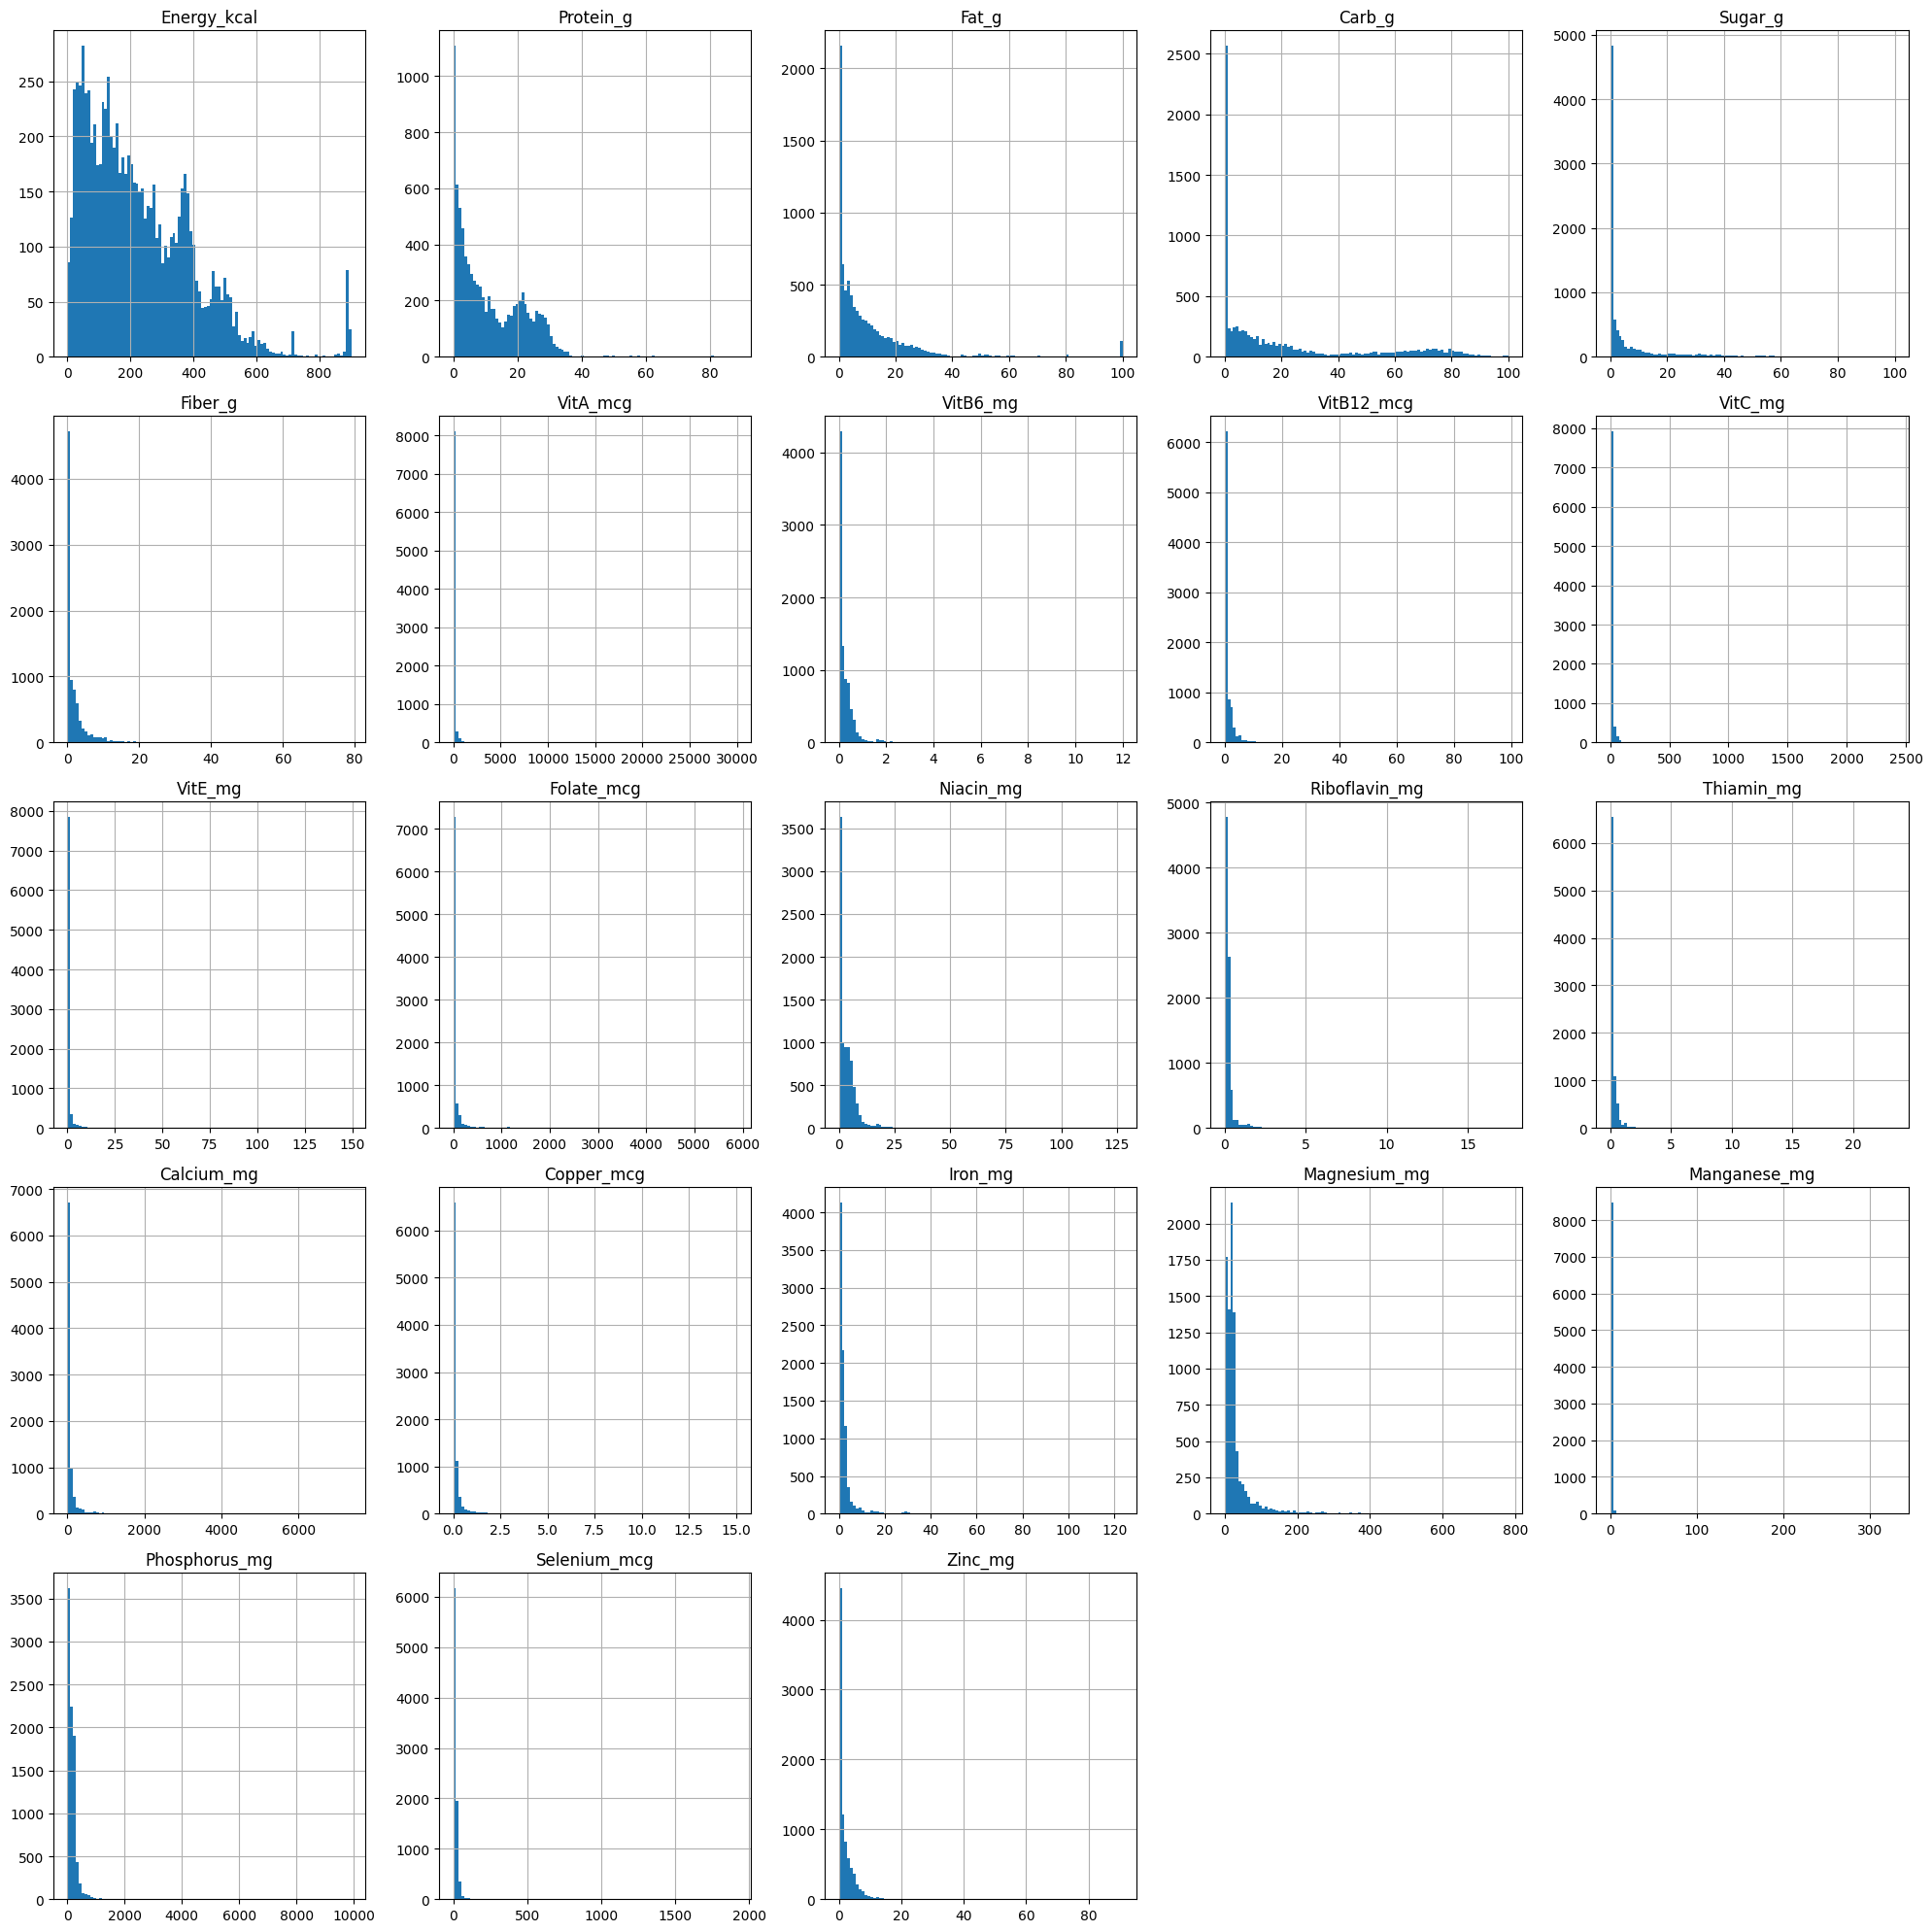

In [40]:
#TODO
num_rows = n_df_clean.shape[1] // 5 + 1

fig, axs = plt.subplots(num_rows, 5, figsize=(20, num_rows * 4))
axs = axs.flatten()

for i, col in enumerate(n_df_clean.columns):
    axs[i].hist(n_df_clean[col], bins=100)
    axs[i].set_title(col)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].grid(True)
    
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [41]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
n_df_clean = n_df_clean + 1
df_boxcoxed = pd.DataFrame(index=n_df_clean.index)

for i in n_df_clean.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(n_df_clean.loc[:, i])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

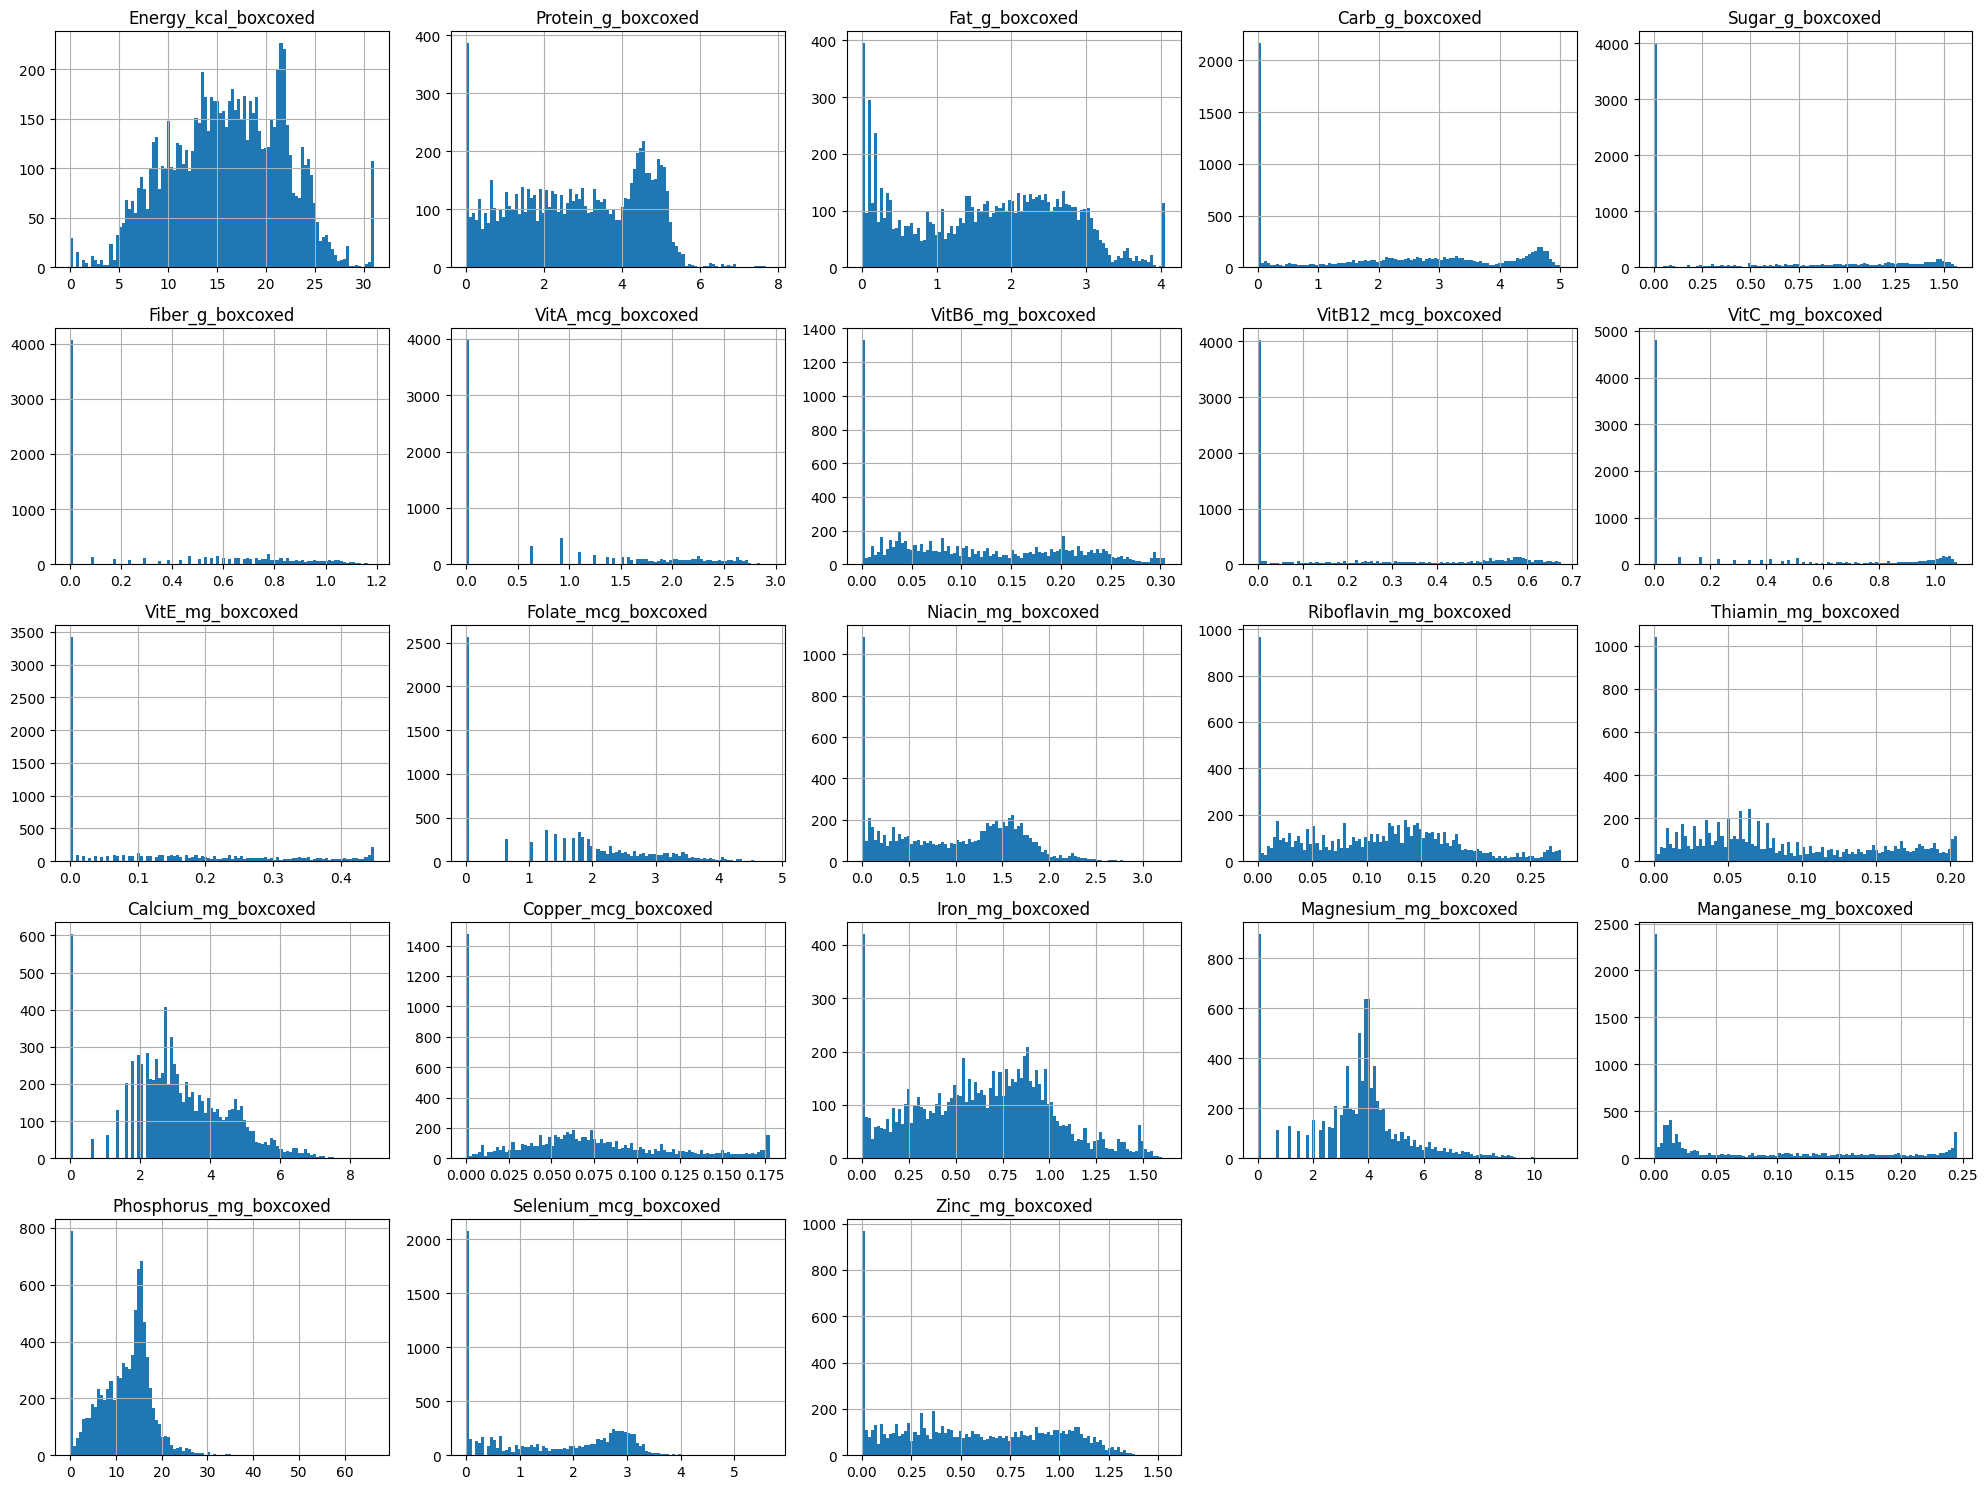

In [42]:
#TODO
num_rows = df_boxcoxed.shape[1] // 5 + 1

fig, axs = plt.subplots(num_rows, 5, figsize=(20, 15))
axs = axs.flatten()

for i, col in enumerate(df_boxcoxed.columns):
    axs[i].hist(df_boxcoxed[col], bins=100)
    axs[i].set_title(col)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].grid(True)
    
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [43]:
#TODO
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_boxcoxed)

print(f"total mean: {np.mean(df_scaled).round(1)}")
print(f"total variance: {np.var(df_scaled).round(1)}")

total mean: 0.0
total variance: 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [44]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        X_centered = X - np.mean(X, axis=0)
        cov_mat = np.cov(X_centered, rowvar=False)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        
        sorted_indices = np.argsort(eig_vals)[::-1]
        eig_vals = eig_vals[sorted_indices]
        eig_vecs = eig_vecs[:, sorted_indices]
        
        self.components = eig_vecs[:, :self.n_components]
        self.explained_variance_ratio_ = eig_vals[:self.n_components] / np.sum(eig_vals)
        
    def transform(self, X):
        #TODO
        X_centered = X - np.mean(X, axis=0)
        return X_centered @ self.components

    def get_explained_variance_ratio(self):
        #TODO
        return self.explained_variance_ratio_
        
    def get_components(self):
        #TODO
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [45]:
#TODO
X = df_scaled

pca = CustomPCA(n_components=X.shape[1])
pca.fit(X)
X_pca = pca.transform(X)

explained_variance_ratio = pca.get_explained_variance_ratio()
components = pca.get_components()

print(f"The explained variance ratio (of the first 5 PCs): {explained_variance_ratio[:5]}")
print(f"Number of principle components: {len(components)}")

The explained variance ratio (of the first 5 PCs): [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037]
Number of principle components: 23


#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


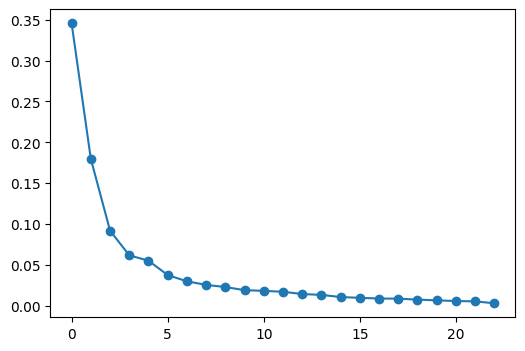

In [46]:
#TODO
plt.figure(figsize=(6, 4))
plt.plot(explained_variance_ratio, marker="o")
plt.show()

therefore we are going to pick 5 components

In [47]:
#TODO
np.sum(explained_variance_ratio[:5])

0.7342383069149607

Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [48]:
#TODO
df_5pc = pd.DataFrame(data=X_pca[:, :5], columns=[f"c{i}" for i in range(1, 6)])
df_5pc[nn_cols[:3]] = df[nn_cols[:3]]
df_5pc.head()

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
0,-2.638414,-1.702512,-1.283725,-3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1,-2.537931,-1.550464,-1.279816,-3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
2,-3.751335,-2.080190,-2.067932,-3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
3,2.000578,-1.361858,0.395834,-2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
4,1.582713,-1.321484,0.238444,-2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [49]:
#TODO
df_5pc.corr(numeric_only=True).round(1)

,c1,c2,c3,c4,c5
c1,1.0,-0.0,-0.0,-0.0,-0.0
c2,-0.0,1.0,0.0,-0.0,0.0
c3,-0.0,0.0,1.0,0.0,0.0
c4,-0.0,-0.0,0.0,1.0,0.0
c5,-0.0,0.0,0.0,0.0,1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [50]:
# TODO get eigenvectors
eigen_vecs = pca.get_components()

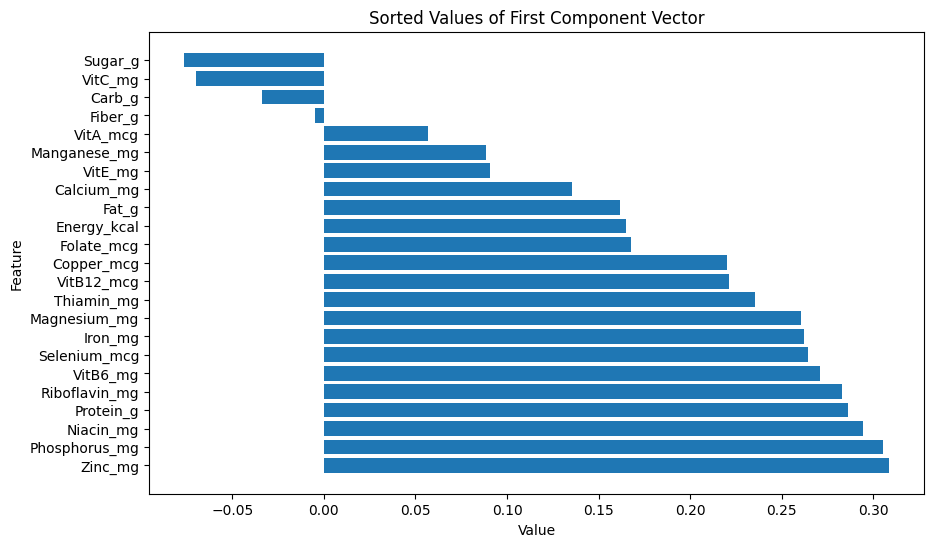

In [51]:
#TODO
pc1_contributions = pd.DataFrame({
    "Feature": n_df_clean.columns,
    "Value": eigen_vecs[:, 0]
})

pc1_contributions.sort_values(by="Value", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(pc1_contributions["Feature"], pc1_contributions["Value"])
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Sorted Values of First Component Vector")
plt.show()

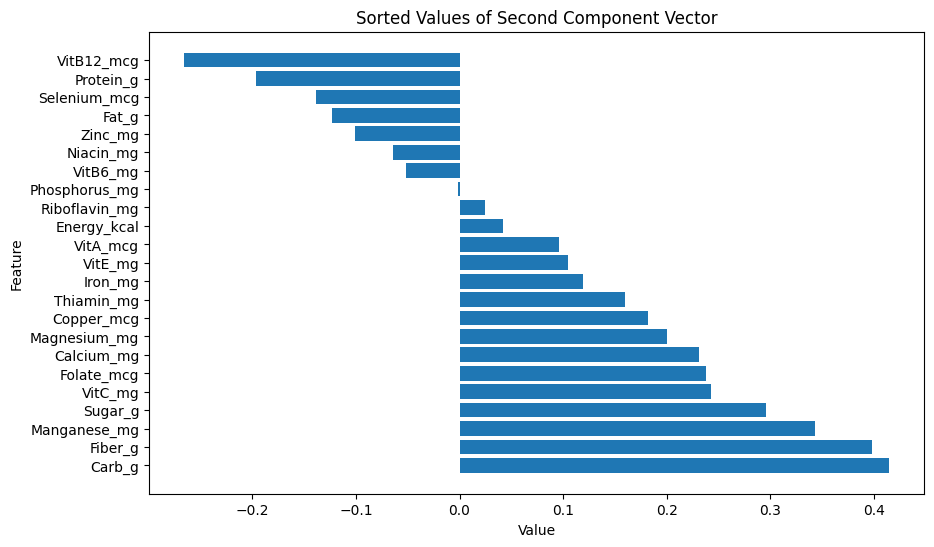

In [52]:
#TODO
pc2_contributions = pd.DataFrame({
    "Feature": n_df_clean.columns,
    "Value": eigen_vecs[:, 1]
})

pc2_contributions.sort_values(by="Value", ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(pc2_contributions["Feature"], pc2_contributions["Value"])
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Sorted Values of Second Component Vector")
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 16px;">

These plots provide info about how the different features contribute to these components. First of all we can compare the features based on their sign. Positive values mean the feature has Positive Loading and that means, higher the amount of that feature (e.g. in a food), higher its score will be in the PC. Negative values on the other hand have Negative Loading meaning that the foods that are higher in that feature will have lower scores in the PC. Another thing to compare the features with, is their absolute value. Higher absolute values (loadings) mean that they contribute more and have more impact on creating the PC (either in a positive or a negative way). So overall we can get these info from these plots:

PC1: 
- Features like Zinc_mg, Phosphorus_mg, Niacin_mg have the highest absolute loadings between the features meaning that the way that their variance change is more aligned to the PC compared to the other features (They also have positive loadings, so they increase as we move in the PC1's direction).

- On the other hand features like Fiber_g, Carb_g have the lower absolute loadings between the features meaning that the way that their variance change is less aligned to the PC compared to the other features (They also have negative loadings, so they decrease as we move in the PC1's direction)


PC2:
- With the exact same interpretation as PC1, we can say that features like Carb_g, Fiber_g, Manganese_mg have both the highest absolute loadings and positive loadings, so they are more aligned to the PC2's direction and also they increase as we move in that direction.

- Also features like Phosphorus_mg, Riboflavin_mg, Energy_kcal have the lowest absolute loadings, so they are less aligned to the PC2's direction.

Another thing to say overall is that if we compare the two plots, we can see that PC1 is more aligned to the foods that are high in protein, zinc, etc and less aligned to the foods that are high in minerals, carbs, fiber, etc. PC2 on the other hand is more aligned to the foods that are high in minerals, fiber, carb, etc and less aligned to the foods that are high in protein, zinc, etc. (We can compare them based on the FoodGroup better, later in the notebook)

This is also logical as we know that the PCs are orthogonal to each other so the features that have high loadings in PC1, should probably have less loadings in PC2.

</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

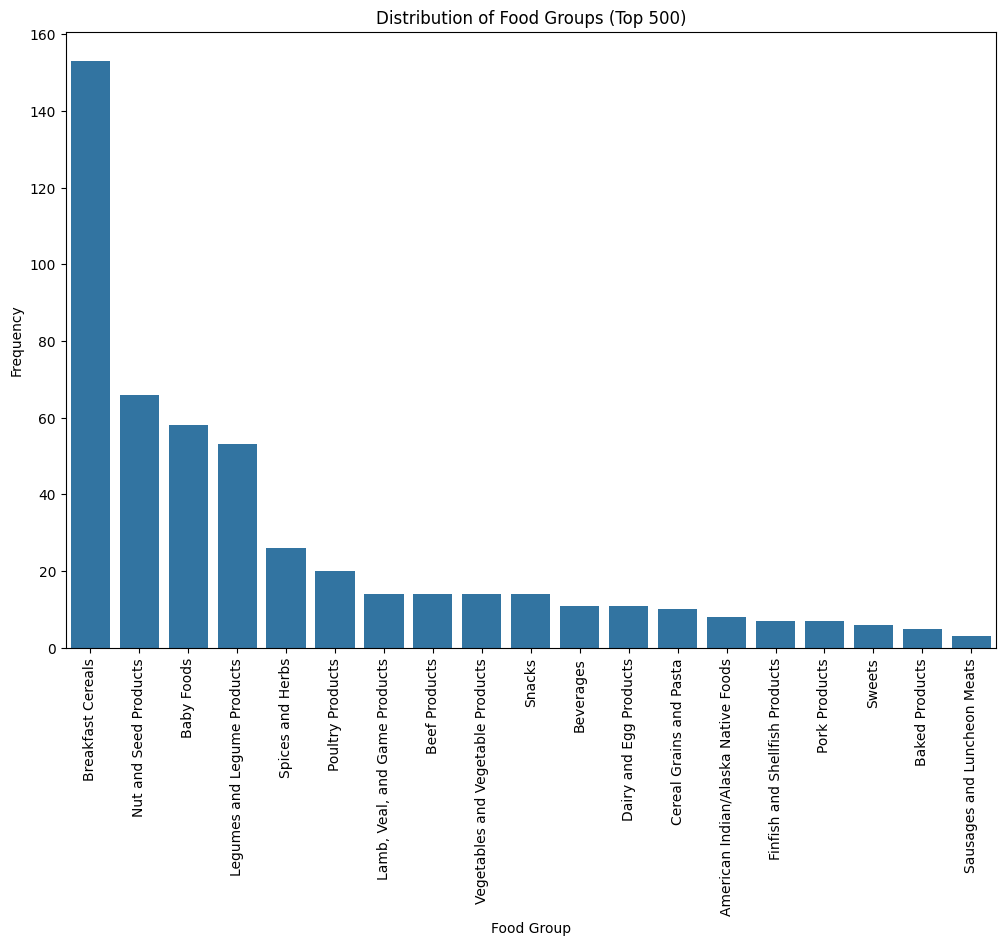

In [53]:
#TODO
pca1_foodgroup_df = pd.DataFrame({
    "Frequency": df_5pc["c1"],
    "FoodGroup": df_5pc["FoodGroup"]
})

top_groups = pca1_foodgroup_df.nlargest(500, "Frequency")

freq_groups = top_groups["FoodGroup"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=freq_groups.index, y=freq_groups.values)
plt.xlabel("Food Group")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Distribution of Food Groups (Top 500)")
plt.show()

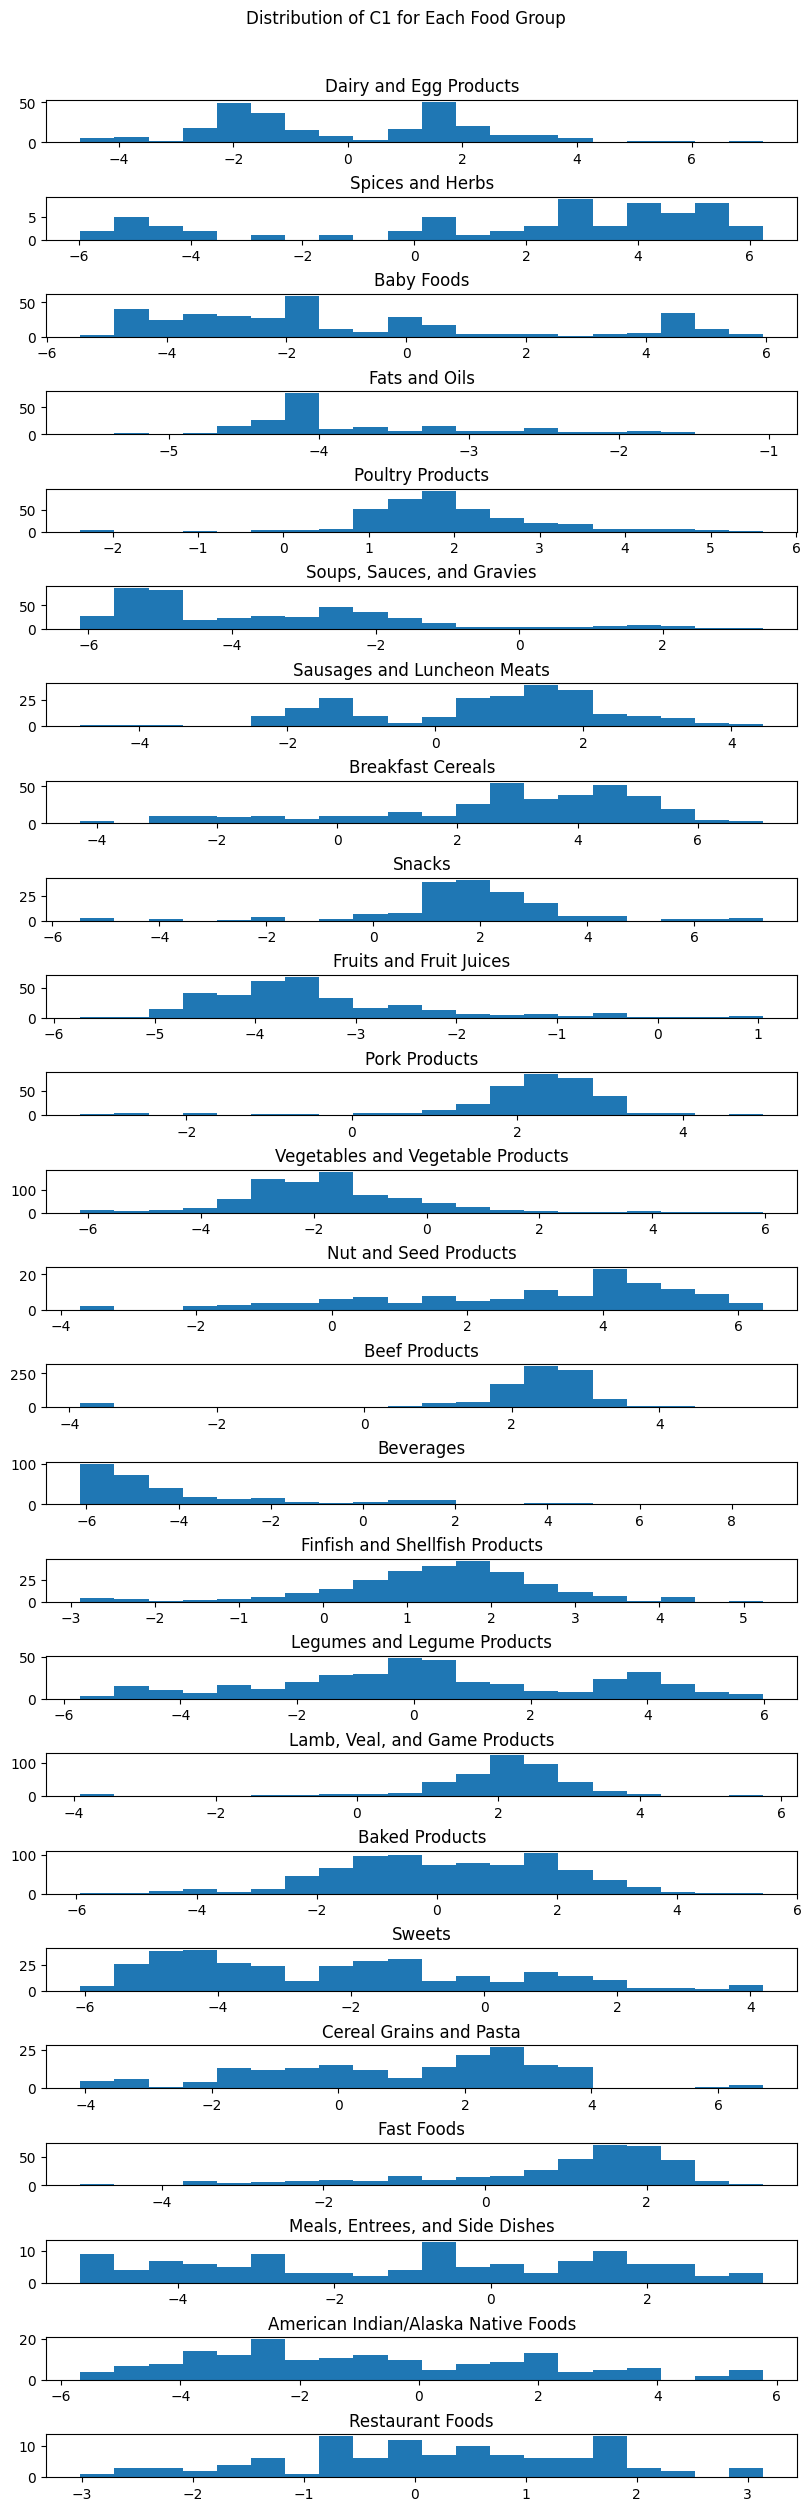

In [54]:
#TODO
unique_food_groups = pca1_foodgroup_df["FoodGroup"].unique()
num_food_groups = len(unique_food_groups)

fig, axs = plt.subplots(num_food_groups, 1, figsize=(8, num_food_groups), constrained_layout=True)

for i, food_group in enumerate(unique_food_groups):
    group_data = pca1_foodgroup_df[pca1_foodgroup_df['FoodGroup'] == food_group]["Frequency"]
    axs[i].hist(group_data, bins=20)
    axs[i].set_title(food_group)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

fig.suptitle("Distribution of C1 for Each Food Group\n\n")
plt.show()

Do the same for pca2.

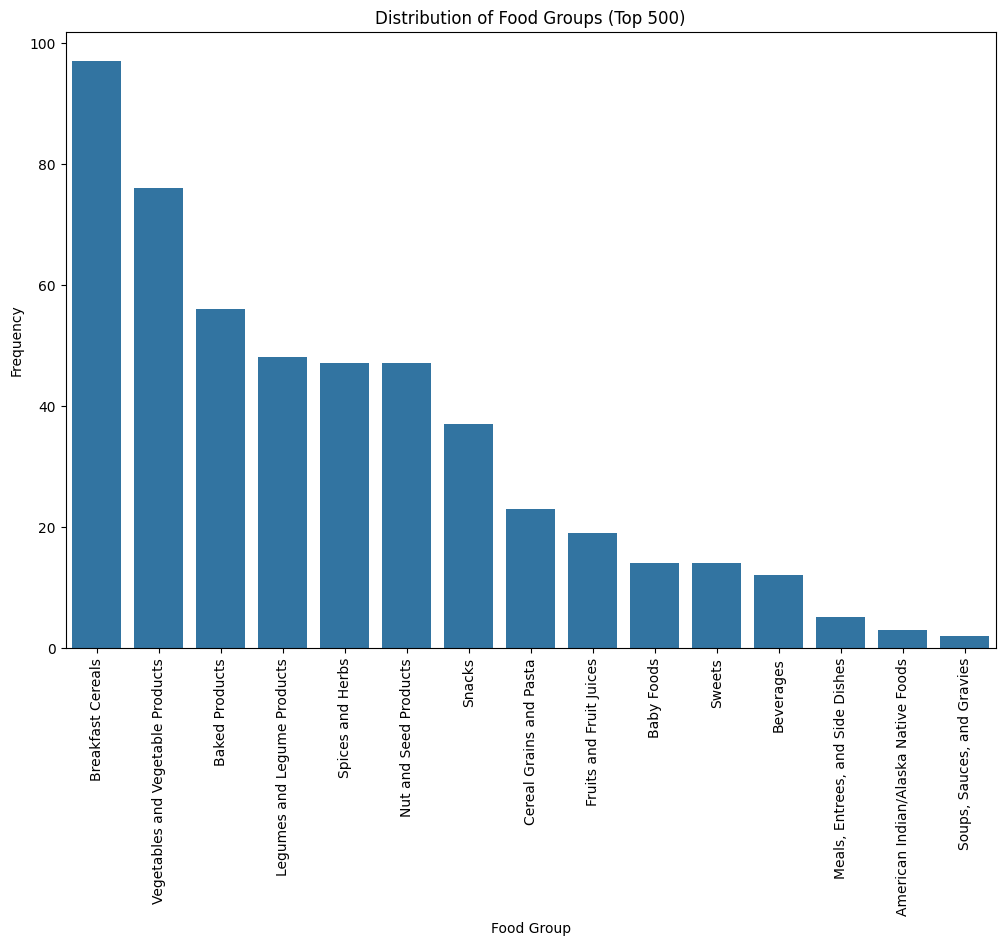

In [55]:
#TODO
pca2_foodgroup_df = pd.DataFrame({
    "Frequency": df_5pc["c2"],
    "FoodGroup": df_5pc["FoodGroup"]
})

top_groups = pca2_foodgroup_df.nlargest(500, "Frequency")

freq_groups = top_groups["FoodGroup"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=freq_groups.index, y=freq_groups.values)
plt.xlabel("Food Group")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.title("Distribution of Food Groups (Top 500)")
plt.show()

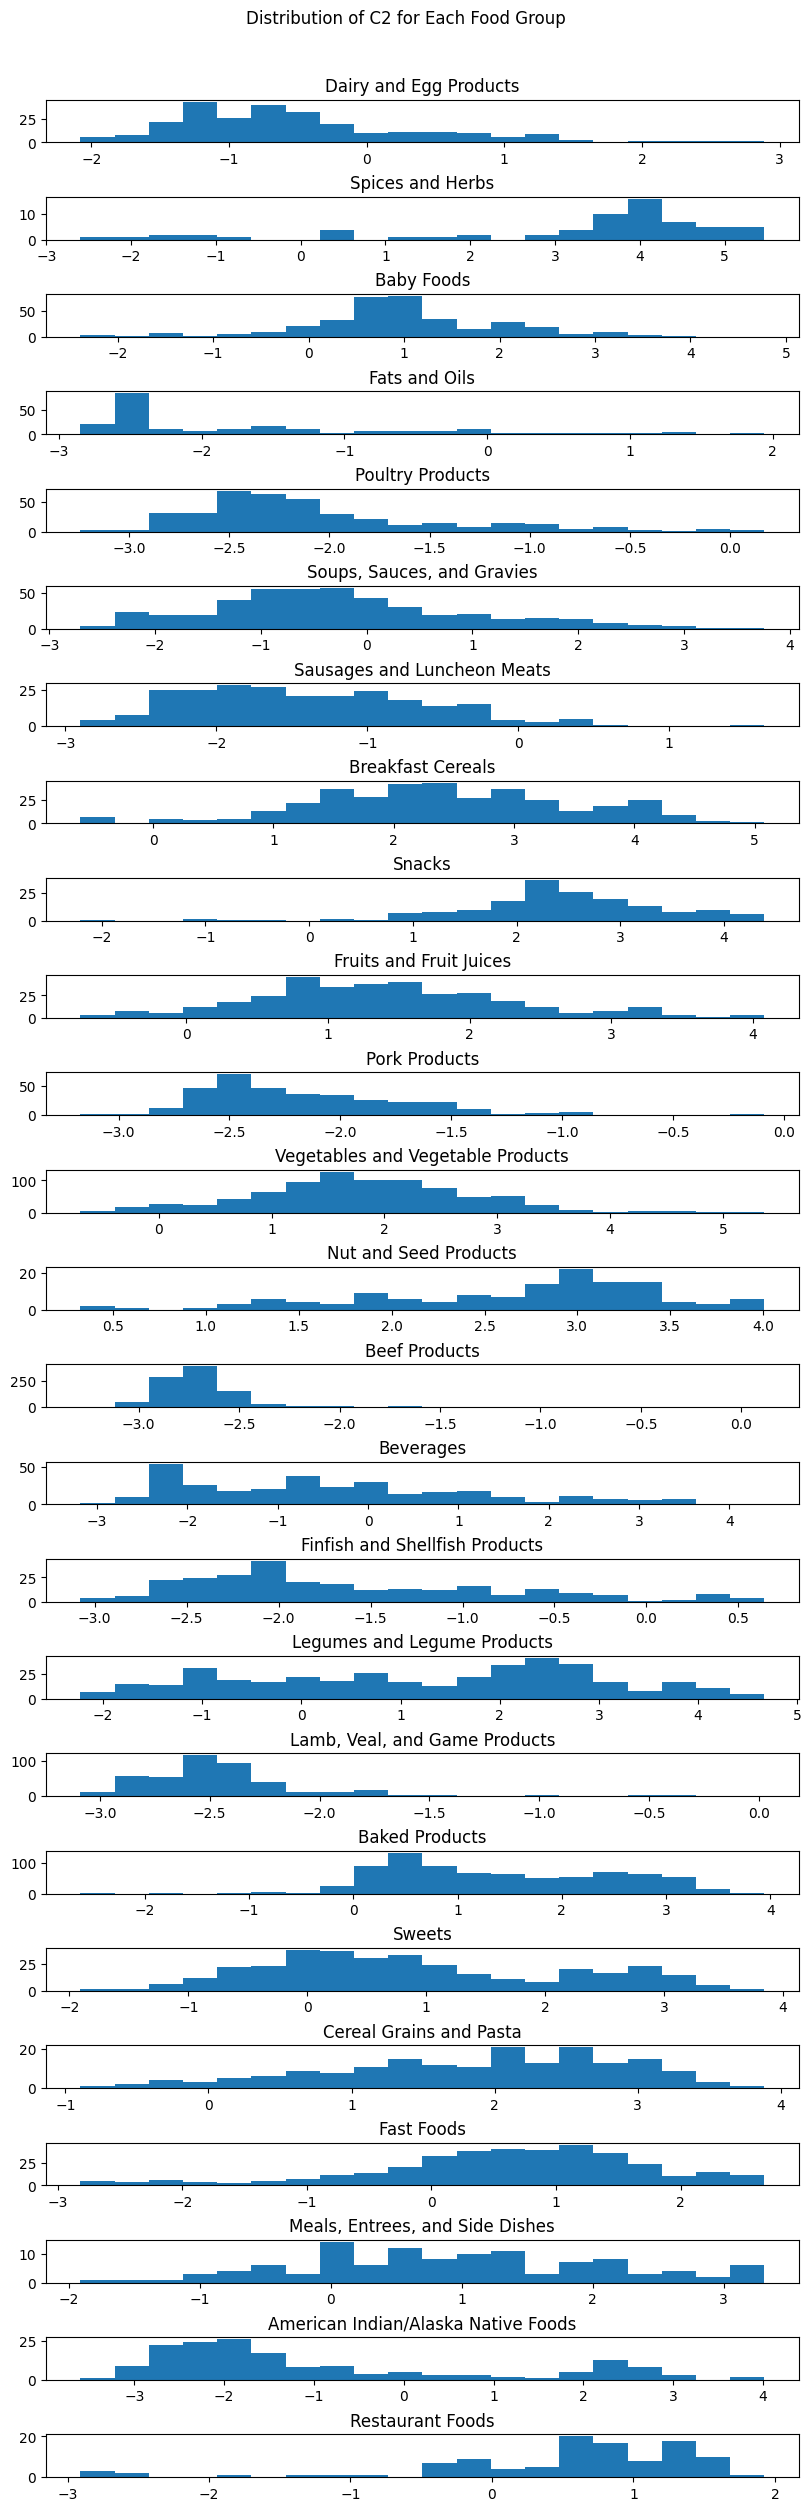

In [56]:
#TODO
unique_food_groups = pca2_foodgroup_df["FoodGroup"].unique()
num_food_groups = len(unique_food_groups)

fig, axs = plt.subplots(num_food_groups, 1, figsize=(8, num_food_groups), constrained_layout=True)

for i, food_group in enumerate(unique_food_groups):
    group_data = pca2_foodgroup_df[pca2_foodgroup_df['FoodGroup'] == food_group]["Frequency"]
    axs[i].hist(group_data, bins=20)
    axs[i].set_title(food_group)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

fig.suptitle("Distribution of C2 for Each Food Group\n\n")
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


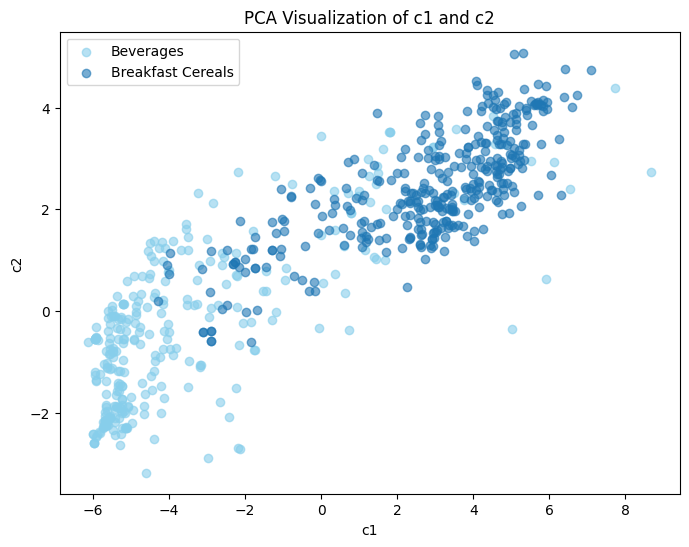

In [57]:
#TODO
beverages_df = df_5pc[df_5pc["FoodGroup"] == "Beverages"]
breakfast_cereals_df = df_5pc[df_5pc["FoodGroup"] == "Breakfast Cereals"]

plt.figure(figsize=(8, 6))

plt.scatter(beverages_df["c1"], beverages_df["c2"], alpha=0.6, color="skyblue", label="Beverages")
plt.scatter(breakfast_cereals_df["c1"], breakfast_cereals_df["c2"], alpha=0.6, label="Breakfast Cereals")

plt.xlabel("c1")
plt.ylabel("c2")
plt.title("PCA Visualization of c1 and c2")
plt.legend()
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 16px;">

We can learn many things from the distributions:

- Dominant Food Groups: If we look at the first plot (for each of the two PCs), we can find the FoodGroups that are more dominant and have higher PC scores. Higher the count of that FoodGroup, stronger its association with the PC values and thus higher its loading. (e.g. in both of the PCs Breakfast Cereal has the strongest association with the PC values)

- Nutritional Characteristics: If a FoodGroup is important in that PC, it could imply that the PC values are influenced by the nutrients found in that FoodGroup.

- Clustering: We can also use those distribution to cluster different FoodGroups together. We can cluster them based on their PC value, e.g. breakfast cereals and nut and seed products both have high counts in the 1st PC, so it could imply that they both have some similar nutrients in them and thus we can cluster them together based on their nutrients and their PC values.

- By looking at the distribution of PCs over the FoodGroups we can see how each food group is centered around the PC values. Overall groups like Breakfast cereal which are centered around a positive PC value tend to have more association with the PCs. This also means that groups like Beverages that are centered around a negative value are more likely to not be aligned and associated with the PCs.

So basically the distribution of FoodGroups and the distribution of PCs over the FoodGroups give us quite the same info. By looking at them we can identify dominant FoodGroups, compare them to each other and see how impactful they are in creating the PCs.

Also we can link these distributions to the previous plots (eigenvectors) and get some cool info about them. From the previous part we know that PC1's direction is more aligned with Zinc_g, etc and also from this part we know that Breakfast cereal is highly associated with PC1, so we can say that the dominant food groups in PC1 probably contain the nutrients that have high loadings in PC1 (e.g. breakfast cereals contain more zinc, phosphorus, etc).

</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 16px;">

From the distribution plots we can see that in PC1, distribution of Breakfast cereals is centered around +4 and is mostly positive, and also distribution of Beverages is centered around -5 and is mostly negative. We also can see that in the scatterplot above. If we just compare them on the c1 axis, we can see that Breakfast cereal is mostly positive and arount the point +4 and Beverages is mostly negative and around the point -5.

This also is true about them respected to the 2nd PC. In the distributions of them related to PC2, we can see that Breakfast cereal is mostly positive and is centered around +2.5 and Beverages on the other hand is mostly negative and is centered around -2. And again these are held true if we compare them only on the c2 axis.

So overall we can see from the distribution plots that these two groups have a quite large frequency gap and also their distribution is so much different from each other (one is mostly positive and the other is mostly negative). This could imply that these two groups can be separated from each other based on these two PCs and from the scatterplot we can see how different their distributions are, over the 2D space.

For these reasons the scatterplot and the distribution plots are related to each other and basically they are different ways to visualize the distributions.

</span>

